## Preliminary analysis

This notebook analyzes the MTA subway data for the week of June 10-17, 2017 that can be found here:

http://web.mta.info/developers/turnstile.html

1.Download that SAME file and read it in below. View the first few rows.

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
june17 = pd.read_csv('June 17.csv')
june17.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,6/10/17,0:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,6/10/17,4:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,6/10/17,8:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,6/10/17,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,6/10/17,16:00:00,REGULAR,6215841,2104465


2.What are the column names?

In [3]:
print(june17.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')


3.We can see that there is a lot of whitespace at the end of the exits column name. Let's strip that whitespace:

In [4]:
june17.columns = june17.columns.str.strip().str.lower()
print(june17.columns)

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')


4.How big is the data set?

In [5]:
print(len(june17)*len(june17.columns))

2169299


5.How many unique stations are there? What are they? Answer each of these questions in one line each.

In [6]:
print(len(set(june17.station)))

376


6.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

It sounds like each C/A + UNIT + SCP + STATION combo refers to a single turnstile. How many unique turnstiles are there? 

In [7]:
unique = []
for index, row in june17.iterrows(): # This creates a list of the unique turnstile tuples
    if (row['c/a'], row.unit, row.scp, row.station) not in unique:
        unique.append((row['c/a'], row.unit, row.scp, row.station))
print(len(unique))

4695


7.What data types are each of the columns?

In [8]:
june17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 11 columns):
c/a         197209 non-null object
unit        197209 non-null object
scp         197209 non-null object
station     197209 non-null object
linename    197209 non-null object
division    197209 non-null object
date        197209 non-null object
time        197209 non-null object
desc        197209 non-null object
entries     197209 non-null int64
exits       197209 non-null int64
dtypes: int64(2), object(9)
memory usage: 16.6+ MB


8.We can see that the exits and entries are treated as integers but the others are all treated as objects (strings). Overwrite the time column so that it is a datetime object containing the combined date and time column info (so that the times have a chronological order). 

In [9]:
june17.time = june17.date + '-' + june17.time
june17.time = pd.to_datetime(june17.time, format = '%m/%d/%y-%H:%M:%S')
june17.date = pd.to_datetime(june17.date, format = '%m/%d/%y') # We changed the date column to datetime too
june17.info() # Just in case we just want to use the date and no time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 11 columns):
c/a         197209 non-null object
unit        197209 non-null object
scp         197209 non-null object
station     197209 non-null object
linename    197209 non-null object
division    197209 non-null object
date        197209 non-null datetime64[ns]
time        197209 non-null datetime64[ns]
desc        197209 non-null object
entries     197209 non-null int64
exits       197209 non-null int64
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 16.6+ MB


9.What is the earliest and latest date in our dataset?

In [11]:
print('Min: {}, Max: {}'.format(min(june17.time), max(june17.time)))

Min: 2017-06-10 00:00:00, Max: 2017-06-16 23:59:54


10.If we wanted to only look at the 34st Street Penn Station stop on 6/12/2017, what would we type?

In [12]:
june17[(june17.station == '34 ST-PENN STA') & (june17.date == dt(2017,6,12))].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
49612,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 00:00:00,REGULAR,1829493,1553798
49613,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 04:00:00,REGULAR,1829495,1553801
49614,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 08:00:00,REGULAR,1829676,1553947
49615,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 12:00:00,REGULAR,1829944,1554414
49616,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 16:00:00,REGULAR,1829981,1554571


11.Create a dictionary called bigDict. It should contain a nested set of keys and values. The outermost key should be the tuple (C/A,UNIT,STATION) and its value should itself be a dictionary with the SCP as the key and a list of (TIME, EXITS) tuples as its values. The purpose of this section is to prepare data for later uses. It should take a little while to finish running.

In [13]:
bigDict = {}
for index, row in june17.iterrows():
    bigDict[(row['c/a'],row['unit'],row['station'])] = bigDict.get((row['c/a'],row['unit'],row['station']), {}) # if no dictionary has been formed as a key for a certain iD, this will create one
    bigDict[(row['c/a'],row['unit'],row['station'])][row['scp']] = bigDict[(row['c/a'],row['unit'],row['station'])].get(row['scp'], []) + [(row['time'], row['exits'])] #this will add the scp data to the dictionary

12.As an example, use the bigDict to view all of the turnstile data located at the('A037', 'R170', '14 ST-UNION SQ') area:

In [14]:
print(bigDict[('A037', 'R170', '14 ST-UNION SQ')])

{'05-00-00': [(Timestamp('2017-06-10 01:00:00'), 30866), (Timestamp('2017-06-10 05:00:00'), 30892), (Timestamp('2017-06-10 09:00:00'), 31064), (Timestamp('2017-06-10 13:00:00'), 31714), (Timestamp('2017-06-10 17:00:00'), 32323), (Timestamp('2017-06-10 21:00:00'), 32825), (Timestamp('2017-06-11 01:00:00'), 33068), (Timestamp('2017-06-11 05:00:00'), 33115), (Timestamp('2017-06-11 09:00:00'), 33214), (Timestamp('2017-06-11 13:00:00'), 33649), (Timestamp('2017-06-11 17:00:00'), 34137), (Timestamp('2017-06-11 21:00:00'), 34527), (Timestamp('2017-06-12 01:00:00'), 34667), (Timestamp('2017-06-12 05:00:00'), 34684), (Timestamp('2017-06-12 09:00:00'), 35349), (Timestamp('2017-06-12 13:00:00'), 36274), (Timestamp('2017-06-12 17:00:00'), 36710), (Timestamp('2017-06-12 21:00:00'), 36993), (Timestamp('2017-06-13 01:00:00'), 37093), (Timestamp('2017-06-13 05:00:00'), 37105), (Timestamp('2017-06-13 09:00:00'), 37870), (Timestamp('2017-06-13 13:00:00'), 38835), (Timestamp('2017-06-13 17:00:00'), 39284

13.Create a function called inspection that takes in the (C/A,UNIT,STATION) tuple and SCP value and plots the exit counter data versus time. 

For example, the input of 
```python
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
```
should produce an upward trending plot.

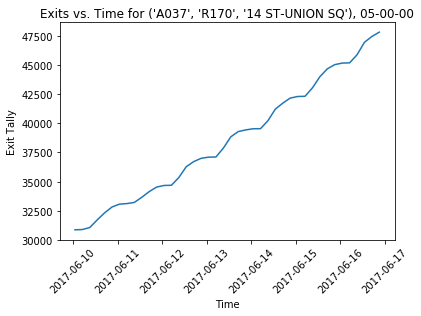

In [15]:
def inspection(iD, scp):
    '''
    This function takes in a (C/A,UNIT,STATION) tuple and an SCP and plots the exit tally vs the day.
    '''
    exits = [count for time, count in bigDict[iD][scp]]
    times = [time for time, count in bigDict[iD][scp]]
    plt.plot(times, exits)
    plt.xlabel('Time')
    plt.ylabel('Exit Tally')
    plt.title('Exits vs. Time for {}, {}'.format(iD, scp))
    plt.xticks(rotation=45)
    

inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')

## Finding Data Errors
14.Due to bugs in MTA data, we will need to remove "incorrect" data. First, find the incorrect data by figuring out which turnstile counters aren't going strictly upwards. How many of these incorrect data values are there? Create a smaller dictionary callled "trouble" that contains the troublesome data from the bigDict.

In [17]:
def is_trouble(iD, scp):
    '''
    This function takes in a (C/A,UNIT,STATION) tuple and an SCP returns False if the data is strictly increasing.
    If the data is not strictly increasing it will return True.
    '''
    exits = [count for time, count in bigDict[iD][scp]]
    sorted_exits = sorted(exits)
    if exits == sorted_exits: # if the sorted list of counts is not equal to the original list, you know that some 
        return False # data had to be moved around and that it wasn't in a strictly increasing order in the
    return True # first place

trouble = {}
for iD in bigDict:
    for scp in bigDict[iD]:
        if is_trouble(iD, scp):
            trouble[iD] = trouble.get(iD, {})
            trouble[iD][scp] = bigDict[iD][scp]
            
# print(trouble)
is_trouble(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')

False

15.Using the troublesome dictionary and your inspection plotting function, plot all of the troublesome data. There are several different types of errors. What do you think is causing each type?

In [18]:
print(trouble.keys())

print(trouble[('A011', 'R080', '57 ST-7 AV')].keys())
print(trouble[('PTH07', 'R550', 'CITY / BUS')].keys())
print(trouble[('B024', 'R211', 'KINGS HWY')].keys())

dict_keys([('A011', 'R080', '57 ST-7 AV'), ('A043', 'R462', 'CANAL ST'), ('A060', 'R001', 'WHITEHALL S-FRY'), ('A069', 'R044', 'CHAMBERS ST'), ('B020', 'R263', 'AVENUE H'), ('B024', 'R211', 'KINGS HWY'), ('B025', 'R150', 'AVENUE U'), ('C021', 'R212', '59 ST'), ('D008', 'R392', '18 AV'), ('H003', 'R163', '6 AV'), ('H009', 'R235', 'BEDFORD AV'), ('JFK02', 'R535', 'HOWARD BCH JFK'), ('JFK03', 'R536', 'JFK JAMAICA CT1'), ('J034', 'R007', '104 ST'), ('K026', 'R100', 'METROPOLITAN AV'), ('N016A', 'R296', '163 ST-AMSTERDM'), ('N029', 'R333', '116 ST'), ('N062', 'R011', '42 ST-PORT AUTH'), ('N078', 'R175', '14 ST'), ('N100', 'R252', 'HIGH ST'), ('N111', 'R284', 'CLINTON-WASH AV'), ('N138', 'R355', '111 ST'), ('N203', 'R195', '161/YANKEE STAD'), ('N311', 'R339', '36 ST'), ('N327', 'R254', 'GRAND-NEWTOWN'), ('N334B', 'R341', '75 AV'), ('N501', 'R020', '47-50 STS ROCK'), ('N506', 'R022', '34 ST-HERALD SQ'), ('N520', 'R240', 'GRAND ST'), ('N539A', 'R288', '7 AV'), ('N551', 'R421', 'AVENUE I'), ('N

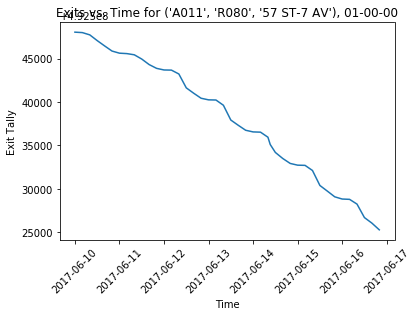

In [19]:
inspection(('A011', 'R080', '57 ST-7 AV'), '01-00-00') # Turnstile malfunctions and begins to 
# count backwards instead on forwards

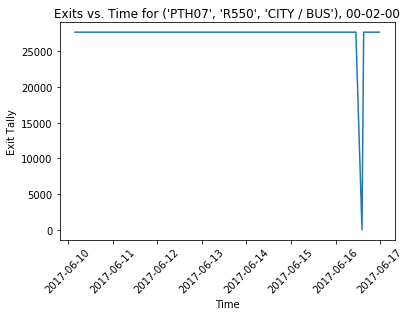

In [20]:
inspection(('PTH07', 'R550', 'CITY / BUS'), '00-02-00') # Issue with data transfer?

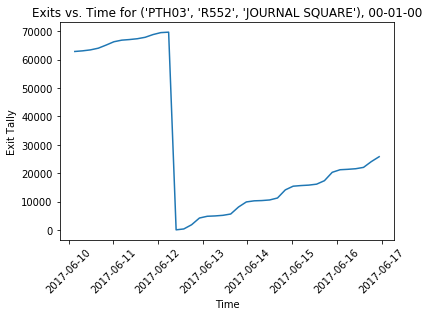

In [21]:
inspection(('PTH03', 'R552', 'JOURNAL SQUARE'), '00-01-00') # Turnstile reaces maximum toll and number is reset

## Data Cleanup
There are three types of mistakes: decreasing, garbage values, and turnstile resets.

#### Mistake Type I: Monotone but Decreasing - To fix this, we reflect the data. 

16.Run the cell below to fix it:

In [22]:
def isMonotoneDecrease(tup):
    '''Input: Tuple of (Station,SCP). 
    Output: True if this SCP has monotone property, but decreasing, False otherwise.'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n-1):
        if(bigDict[tup[0]][tup[1]][i+1][1]>bigDict[tup[0]][tup[1]][i][1]):
            return False
    return True

def fixMonotoneDecrease(tup):
    '''reflects the data to fix it'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n):
        bigDict[tup[0]][tup[1]][i] = (bigDict[tup[0]][tup[1]][i][0],(-1)*bigDict[tup[0]][tup[1]][i][1])
    

# monotoneDecreaseList = []
# for k in trouble:
#     if(isMonotoneDecrease(k)):
#         monotoneDecreaseList.append(k)
# print("Total Monotone Decrease:",len(monotoneDecreaseList))
# for k in monotoneDecreaseList:
#     fixMonotoneDecrease(k)
# print("Problem Fixed!")

# for k in trouble:
#     if(isMonotoneDecrease(k)):
#         monotoneDecreaseList.append(k)
# print("Total Monotone Decrease:",len(monotoneDecreaseList))
# for k in monotoneDecreaseList:
#     inspection(k[0], k[1])

#### Mistake Type II: Garbage Value - To fix this, remove the garbage value

17.Run the cell below to fix it:

In [23]:
def garbageEliminator(tup):
    '''removes nonsensical isolated points'''
    n = len(bigDict[tup[0]][tup[1]])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[tup[0]][tup[1]][i-1][1]>bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        if((bigDict[tup[0]][tup[1]][i-1][1]<=bigDict[tup[0]][tup[1]][i][1]) and (bigDict[tup[0]][tup[1]][i][1]<=bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        toDel.append(bigDict[tup[0]][tup[1]][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[tup[0]][tup[1]].remove(k)
    return 1


#Driver
# cnt = 0
# healList = []
# for k in trouble:
#     if(garbageEliminator(k)):
#         healList.append(k)
# print("Garbage Removed:",len(healList))
# for k in healList:
#     inspection(k[0], k[1])

#### Mistake Type III: Turnstile Reset - To fix this, shift the data upwards.

18.Run the cell below to fix it:

In [24]:
def dealingWithReset(tup):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
# inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
# dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
# print("Cleaned")
# inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

## Overall Cleaning Process
19.This next cell does all of the previous cleanup in one cell. Run the cell below:

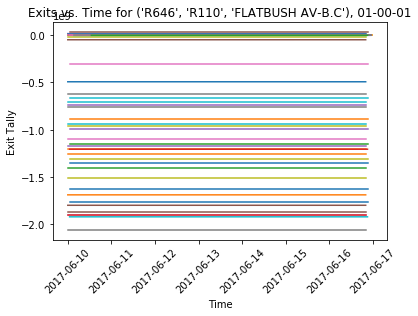

In [25]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue

            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    if(isMonotoneDecrease(k)):
        fixMonotoneDecrease(k)
    garbageEliminator(k)
    dealingWithReset(k)
    inspection(k[0], k[1])

20.Which troublesome stations are left?

In [26]:
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

Trouble List:  2
(('PTH11', 'R545', '14TH STREET'), '00-00-03') 3
(('R240', 'R047', 'GRD CNTRL-42 ST'), '00-00-01') 1


21.Delete these two keys from bigDict manually:

In [27]:
del bigDict[('PTH11', 'R545', '14TH STREET')]['00-00-03']
del bigDict[('R240', 'R047', 'GRD CNTRL-42 ST')]['00-00-01']

22.The data is now all cleaned, so let's save it so that we don't have to run all of the above code every time. Use the pickle package to save bigDict as an "MTAdict.pkl" file.

In [28]:
import pickle

with open('MTAdict.pkl', 'wb') as handle:
    pickle.dump(bigDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# --At this point, the data is ready to use and so we are ready for data analysis.--
23.Let's read the cleaned data file back in and save it as bigDict.

In [29]:
with open('MTAdict.pkl', 'rb') as handle:
    bigDict = pickle.load(handle)

24.Create a function called turnstileRiders that takes in a single turnstile's date/exit info and a start and endtime (in datetime format) and returns the number of riders through that turnstile within that time period. As an extension, you may want to use a linear approximation in the case of incomplete information. 

For instance, the input 
```python
t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
```

should output 1419 riders.

In [56]:
def turnstileRiders(lis, t1, t2):
    '''
    This function takes in a the bigDict[(C/A,UNIT,STATION)][scp] and time one and time two. 
    It returns the net number of exits for that turnstile between the two times.
    Both times should be in datetime format.
    '''
    from datetime import datetime
    try:
        count = 0
        for iD in lis:
            if count == 0 and iD[0] >= t1:
                baseline = iD[-1] # This designates the baseline value as the first exit that is after or on t1
                count += 1 # we chose to not have them be strictly equal to account for variability in the way
            elif iD[0] >= t1 and iD[0] <= t2: # data was tracked over time (sometimes it took data from 1:00 not 12:00)
                actual = iD[-1] - baseline # this defines the actual count as last count before or on t2 minus the baseline
        return actual
    except:
        return 0


t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
print(turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2))

1388


25.Create a function called stationRiders that calls the turnstileRiders function for each turnstile in a  (C/A,UNIT,STATION) station area and tallies all of the riders through that area between two times.

For example, an input of 
```python
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))
```
should output 9507 riders.

In [57]:
def getStationRangeRider(iD, t1, t2):
    '''
    This function takes in a bigDict[(C/A,UNIT,STATION)] and time one and time two.
    It returns the net number of exits for for that iD between the two times.
    Both times should be in datetime format.
    '''
    total = 0
    for scp in iD:
        total += turnstileRiders(iD[scp],t1,t2)
    return total

t1 = dt.strptime("2017-06-12 02:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 02:00:00","%Y-%m-%d %H:%M:%S")
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],t1,t2)

9524

26.There are still several station areas within a station. Make a plot of the day of the week versus the number of total station rider exits for the ENTIRE Wall St station.

Text(0.5,1,'Wall Street')

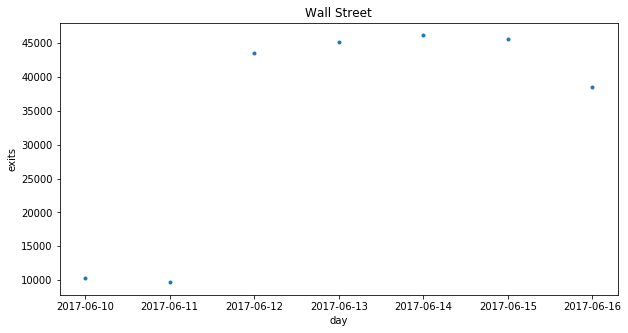

In [58]:
mon,tue,wed,thu,fri,sat,sun = 0,0,0,0,0,0,0

for station in bigDict.keys():
    if station[2] == 'WALL ST':
        sat = sat + getStationRangeRider(bigDict[station], dt(2017,6,10,2,0,0),dt(2017,6,11,2,0,0))
        sun = sun + getStationRangeRider(bigDict[station], dt(2017,6,11,2,0,0),dt(2017,6,12,2,0,0))
        mon = mon + getStationRangeRider(bigDict[station], dt(2017,6,12,2,0,0),dt(2017,6,13,2,0,0))
        tue = tue + getStationRangeRider(bigDict[station], dt(2017,6,13,2,0,0),dt(2017,6,14,2,0,0))
        wed = wed + getStationRangeRider(bigDict[station], dt(2017,6,14,2,0,0),dt(2017,6,15,2,0,0))
        thu = thu + getStationRangeRider(bigDict[station], dt(2017,6,15,2,0,0),dt(2017,6,16,2,0,0))
        fri = fri + getStationRangeRider(bigDict[station], dt(2017,6,16,2,0,0),dt(2017,6,16,22,0,0))
counts = [sat, sun, mon, tue, wed, thu, fri]   

days = [ dt(2017,6,10,0,0,0), 
        dt(2017,6,11,0,0,0), 
        dt(2017,6,12,0,0,0), 
        dt(2017,6,13,0,0,0), 
        dt(2017,6,14,0,0,0), 
        dt(2017,6,15,0,0,0), 
        dt(2017,6,16,0,0,0)]

plt.rcParams['figure.figsize'] = [10,5]
plt.plot(days, counts,'.')
plt.xlabel('day')
plt.ylabel('exits')
plt.title('Wall Street')

27.Sort by busiest station areas during 6/12 midnight - 6/13 midnight in descending order by creating a list of sorted tuples:

In [59]:
twelth_to_thirteenth = [(getStationRangeRider(bigDict[tup], dt(2017,6,12,1,0,0), dt(2017,6,13,1,0,0)), tup) for tup, scps in bigDict.items()]
twelth_to_thirteenth.sort(reverse = True)
for tup in twelth_to_thirteenth:
    print(tup)

(56743, ('PTH22', 'R540', 'PATH NEW WTC'))
(53755, ('R238', 'R046', 'GRD CNTRL-42 ST'))
(36164, ('R249', 'R179', '86 ST'))
(35595, ('R240', 'R047', 'GRD CNTRL-42 ST'))
(30032, ('R533', 'R055', 'FLUSHING-MAIN'))
(28346, ('H009', 'R235', 'BEDFORD AV'))
(27771, ('N500', 'R020', '47-50 STS ROCK'))
(27243, ('A025', 'R023', '34 ST-HERALD SQ'))
(26676, ('N324', 'R018', 'JKSN HT-ROOSVLT'))
(26381, ('N506', 'R022', '34 ST-HERALD SQ'))
(26181, ('R138', 'R293', '34 ST-PENN STA'))
(25957, ('R221', 'R170', '14 ST-UNION SQ'))
(25744, ('N049', 'R084', '59 ST COLUMBUS'))
(25518, ('PTH03', 'R552', 'JOURNAL SQUARE'))
(25365, ('N507', 'R023', '34 ST-HERALD SQ'))
(25051, ('N063A', 'R011', '42 ST-PORT AUTH'))
(24777, ('N083', 'R138', 'W 4 ST-WASH SQ'))
(24729, ('A034', 'R170', '14 ST-UNION SQ'))
(24158, ('N306', 'R017', 'LEXINGTON AV/53'))
(23524, ('R169', 'R168', '96 ST'))
(23309, ('R258', 'R132', '125 ST'))
(22615, ('N501', 'R020', '47-50 STS ROCK'))
(22407, ('R151', 'R033', 'TIMES SQ-42 ST'))
(22112, ('

28.Make a dictionary called total_dict that contains the station name as its key and the total number of riders through all of its station areas between 6/12-6/13 as its value. Then create a sorted list of tuples to view the busiest stations on that day.

In [60]:
total_dict = {}

sortList = []
total_dict = {}
for tup, scps in bigDict.items():
    total_dict[tup[-1]] = total_dict.get(tup[-1], 0) + getStationRangeRider(bigDict[tup], dt(2017,6,12,0,0,0), dt(2017,6,13,0,0,0))
for thing1, thing2 in total_dict.items():
    sortList.append((thing2, thing1))
sortList.sort(reverse = True)
print(sortList)

[(135549, '34 ST-PENN STA'), (132884, 'GRD CNTRL-42 ST'), (109563, '34 ST-HERALD SQ'), (91048, 'TIMES SQ-42 ST'), (84115, '14 ST-UNION SQ'), (84095, '23 ST'), (79292, 'FULTON ST'), (71420, '42 ST-PORT AUTH'), (71240, '86 ST'), (62141, '47-50 STS ROCK'), (57251, '59 ST'), (56297, 'PATH NEW WTC'), (55971, '125 ST'), (55966, '59 ST COLUMBUS'), (54458, 'CANAL ST'), (50766, 'CHAMBERS ST'), (47196, 'LEXINGTON AV/53'), (47075, '14 ST'), (46095, 'FLUSHING-MAIN'), (44748, '96 ST'), (43749, '72 ST'), (43525, 'WALL ST'), (41687, '28 ST'), (40872, '42 ST-BRYANT PK'), (39204, 'ATL AV-BARCLAY'), (38847, '50 ST'), (37885, 'JKSN HT-ROOSVLT'), (33762, 'W 4 ST-WASH SQ'), (33735, 'JAMAICA CENTER'), (33147, '7 AV'), (30358, '145 ST'), (29966, 'BOWLING GREEN'), (28806, 'BEDFORD AV'), (28447, '5 AV/53 ST'), (28121, '77 ST'), (27153, 'LEXINGTON AV/63'), (26880, 'CHURCH AV'), (26253, 'KEW GARDENS'), (26145, "B'WAY-LAFAYETTE"), (25459, 'GRAND ST'), (25132, 'KINGS HWY'), (24382, 'JOURNAL SQUARE'), (23980, '8 AV

29.Make a histogram of those station totals:

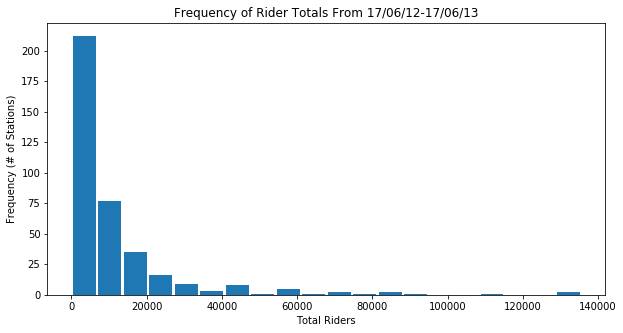

In [62]:
totals = [total for total, station in sortList]
plt.hist(totals, rwidth = 0.9, bins = 20)
plt.title("Frequency of Rider Totals From 17/06/12-17/06/13")
plt.xlabel("Total Riders")
plt.ylabel("Frequency (# of Stations)");

30.Create a commuter index to be the average weekday exits divided by the sum of the avg weekday exits + avg weekend exits. To do this, first make a function called isWeekday that returns True if the datetime input is a weekday and False if it isn't.

In [64]:
def isWeekday(date):
    '''
    This function takes in a datetime object and returns True if that day is a weekday and False if it is not.
    '''
    if date.weekday() in [5,6]:
        return False
    return True

for i in range(10,17):
    print(isWeekday(dt(2017,6,i,0,0,0)))

False
False
True
True
True
True
True


31.Make a function called commuterIndex that inputs a (C/A,UNIT,STATION) tuple and outputs its commuter index. 

For example, the output of 
```python
getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
```
should be 0.663.

In [72]:
def getCommuteIndex(iD):
    '''
    This function takes in a (C/A,UNIT,STATION) tuple and returns the commuter index for that iD.
    The commuter index is defined as the average weekday exits divided by the average weekday exits + average 
    weekend exits.
    '''
    weekdays = []
    weekends = []
    for i in range(10,17):
        for key in bigDict.keys():
            if key == iD and isWeekday(dt(2017,6,i,0,0,0)):
                weekdays.append(abs(getStationRangeRider(bigDict[iD], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))))
            elif key == iD:
                weekends.append(abs(getStationRangeRider(bigDict[iD], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))))
    dayAvg = sum(weekdays)/5
    endAvg = sum(weekends)/2
    try:
        return dayAvg/(endAvg + dayAvg)
    except:
        return 0

getCommuteIndex(('PTH11', 'R545', '14TH STREET'))

0.676321142201943

32.Create a sorted list of tuples in descending order containing the commuter index and the station area tuple.

In [73]:
commuter_i = [(getCommuteIndex(key), key) for key in bigDict.keys()]
commuter_i.sort(reverse = True)
print(commuter_i)

[(1.0, ('R630', 'R066', 'JUNIUS ST')), (1.0, ('R627', 'R063', 'SUTTER AV-RUTLD')), (1.0, ('R237B', 'R047', 'GRD CNTRL-42 ST')), (1.0, ('R204A', 'R043', 'WALL ST')), (1.0, ('R203A', 'R043', 'WALL ST')), (1.0, ('R112', 'R027', 'WALL ST')), (1.0, ('N554', 'R423', 'AVENUE N')), (1.0, ('N401', 'R360', '21 ST')), (0.9997511653754915, ('R634', 'R069', 'NEW LOTS AV')), (0.9992930863848438, ('R242A', 'R049', '51 ST')), (0.9991714603602964, ('R237', 'R046', 'GRD CNTRL-42 ST')), (0.999009861776704, ('R230', 'R143', '28 ST')), (0.9989731653888281, ('N412', 'R299', 'BROADWAY')), (0.9988500837796104, ('R633', 'R068', 'VAN SICLEN AV')), (0.9987639060568603, ('R137', 'R031', '34 ST-PENN STA')), (0.9983459591782725, ('R629', 'R065', 'ROCKAWAY AV')), (0.9972474538948527, ('R632', 'R067', 'PENNSYLVANIA AV')), (0.9970398631758979, ('N405', 'R239', 'GREENPOINT AV')), (0.9965086507874932, ('C016', 'R278', '25 ST')), (0.9961351862511306, ('R628', 'R064', 'SARATOGA AV')), (0.9957164886629734, ('N318', 'R298',

33.Remember that there are still several station areas within each station. Let's get all of the commuter indexes for each station area and then take the median of that commuter index to assign to the entire station. Create a sorted list of tuples in descending order containing the median commuter index and the station name.

In [122]:
import statistics
station_dict = {}
for tup in commuter_i:
    station_dict[tup[-1][-1]] = station_dict.get(tup[-1][-1], []) + [tup[0]]
sort_station = []
for key, value in station_dict.items():
    sort_station.append((statistics.median(value), key))
new_station = {}
for tup in sort_station:
    new_station[tup[-1]] = tup[0]
sort_station.sort(reverse = True)
print(sort_station)

[(1.0, 'SUTTER AV-RUTLD'), (1.0, 'JUNIUS ST'), (1.0, '21 ST'), (0.9997511653754915, 'NEW LOTS AV'), (0.9972474538948527, 'PENNSYLVANIA AV'), (0.9970398631758979, 'GREENPOINT AV'), (0.9961351862511306, 'SARATOGA AV'), (0.9921636558607605, 'FLUSHING AV'), (0.991384958866212, 'NASSAU AV'), (0.9907097580915847, 'MYRTLE-WILLOUGH'), (0.9709334696339605, 'WALL ST'), (0.9601226993865031, 'BAY 50 ST'), (0.9437704772868148, '25 AV'), (0.9308408339103008, 'BOWLING GREEN'), (0.8604437460981067, 'THIRTY ST'), (0.8545342232534314, 'LACKAWANNA'), (0.8544575202064635, '5 AV/53 ST'), (0.8542116630669547, 'AVENUE N'), (0.8383606739287234, 'NEWARK HW BMEBE'), (0.819361375855495, 'NORTHERN BLVD'), (0.8180709581872083, 'FULTON ST'), (0.8120978284321814, 'HUNTERS PT AV'), (0.8106149103362603, '47-50 STS ROCK'), (0.8074075998026026, 'LEXINGTON AV/53'), (0.8063163282850263, 'FRANKLIN ST'), (0.8051772157914188, '25 ST'), (0.8042573083382819, 'VAN SICLEN AV'), (0.8026278558632383, 'HOUSTON ST'), (0.801833577573

### How can you use what you have done so far to make decisions about MTA advertising???

In [114]:
# Making lists for each day of tuples that have the cumulative exit tallys and the station as their two elements.

ten_eleven = []
eleven_twelve = []
twelve_thirteen = []
thirteen_fourteen = []
fourteen_fifteen = []
fifteen_sixteen = []
sixteen = []

lists = [ten_eleven, eleven_twelve, twelve_thirteen, thirteen_fourteen, fourteen_fifteen, fifteen_sixteen, sixteen]


for n in range(10,17):
    total_dict = {}
    for tup, scps in bigDict.items():
        total_dict[tup[-1]] = total_dict.get(tup[-1], 0) + abs(getStationRangeRider(bigDict[tup], dt(2017,6,n,0,0,0), dt(2017,6,n+1,0,0,0)))
    for count,station in total_dict.items():
        lists[n-10].append((station, count))

for item in lists:
    item.sort(reverse = True)

del eleven_twelve[0] # This was just deleting a HUGE outlier
print(eleven_twelve)

[(65731, '34 ST-PENN STA'), (51197, 'TIMES SQ-42 ST'), (46295, '14 ST-UNION SQ'), (42316, '42 ST-PORT AUTH'), (41093, 'GRD CNTRL-42 ST'), (40100, '86 ST'), (36179, '125 ST'), (33774, '23 ST'), (31960, '59 ST COLUMBUS'), (31063, 'CANAL ST'), (29596, '59 ST'), (28911, '72 ST'), (27373, 'FLUSHING-MAIN'), (25793, 'BEDFORD AV'), (25721, '96 ST'), (25272, 'JKSN HT-ROOSVLT'), (25133, '14 ST'), (23298, 'FULTON ST'), (23109, 'ATL AV-BARCLAY'), (22744, 'W 4 ST-WASH SQ'), (20805, '145 ST'), (20270, '50 ST'), (20209, 'CHAMBERS ST'), (18063, '8 AV'), (17056, '28 ST'), (15879, '161/YANKEE STAD'), (15613, 'CHURCH AV'), (15597, '47-50 STS ROCK'), (15562, 'CROWN HTS-UTICA'), (15184, '7 AV'), (14943, 'PATH NEW WTC'), (14930, 'JAMAICA CENTER'), (14751, '1 AV'), (14602, 'GRAND ST'), (13407, '42 ST-BRYANT PK'), (12729, '181 ST'), (12441, '77 ST'), (12304, '49 ST'), (12205, "B'WAY-LAFAYETTE"), (12124, '82 ST-JACKSON H'), (12014, '57 ST-7 AV'), (11796, 'KINGS HWY'), (11578, 'LEXINGTON AV/63'), (11317, 'JOURN

In [ ]:
# Everything under this point is graphing the top ten stations from the lists created above

Text(0.5,1,'Top Ten Stations (June 10th)')

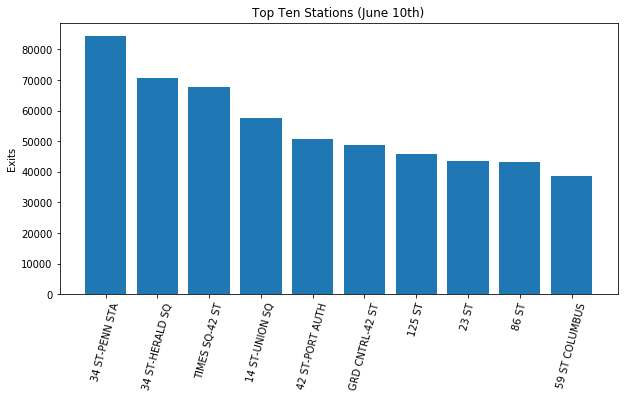

In [110]:
objects = [tup[-1] for tup in ten_eleven[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in ten_eleven[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 10th)')

Text(0.5,1,'Top Ten Stations (June 10th) - CI Adjusted')

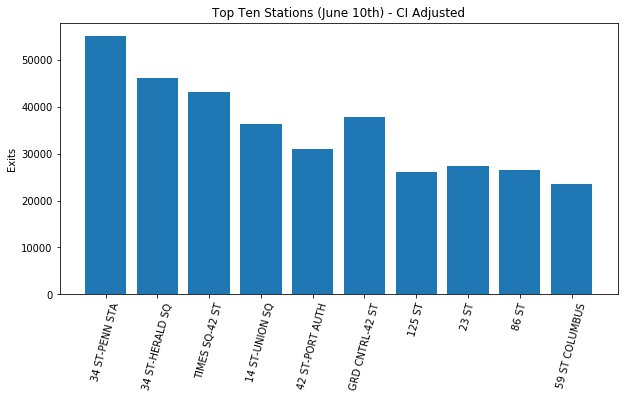

In [124]:
objects = [tup[-1] for tup in ten_eleven[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0]*new_station[tup[-1]] for tup in ten_eleven[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 10th) - CI Adjusted')

Text(0.5,1,'Top Ten Stations (June 11th)')

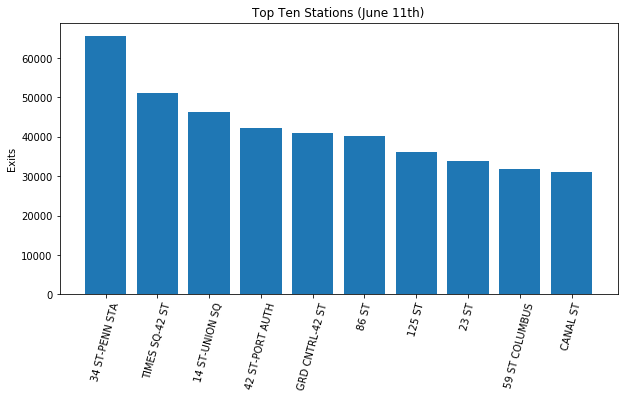

In [115]:
objects = [tup[-1] for tup in eleven_twelve[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in eleven_twelve[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 11th)')

Text(0.5,1,'Top Ten Stations (June 11th) = CI Adjusted')

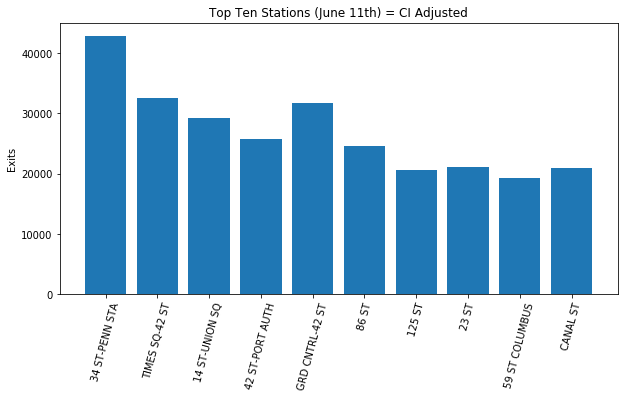

In [125]:
objects = [tup[-1] for tup in eleven_twelve[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0]*new_station[tup[-1]] for tup in eleven_twelve[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 11th) = CI Adjusted')

Text(0.5,1,'Top Ten Stations (June 12th)')

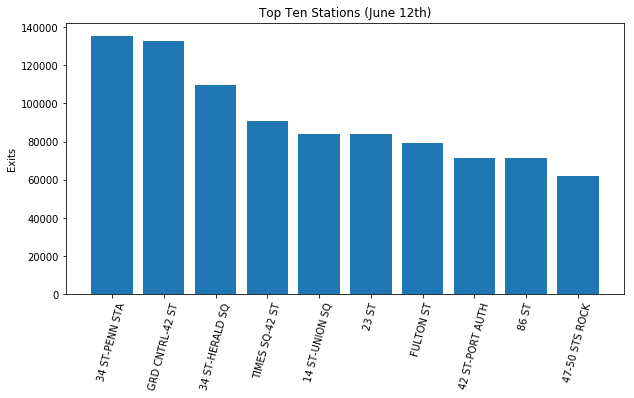

In [112]:
objects = [tup[-1] for tup in twelve_thirteen[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in twelve_thirteen[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 12th)')

Text(0.5,1,'Top Ten Stations (June 13th)')

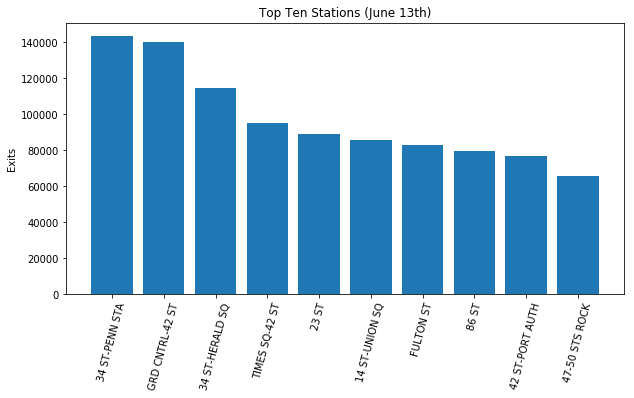

In [116]:
objects = [tup[-1] for tup in thirteen_fourteen[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in thirteen_fourteen[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 13th)')

Text(0.5,1,'Top Ten Stations (June 14th)')

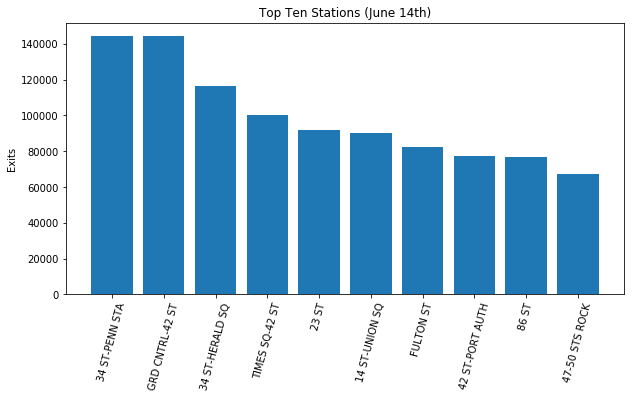

In [118]:
objects = [tup[-1] for tup in fourteen_fifteen[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in fourteen_fifteen[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 14th)')

Text(0.5,1,'Top Ten Stations (June 15th)')

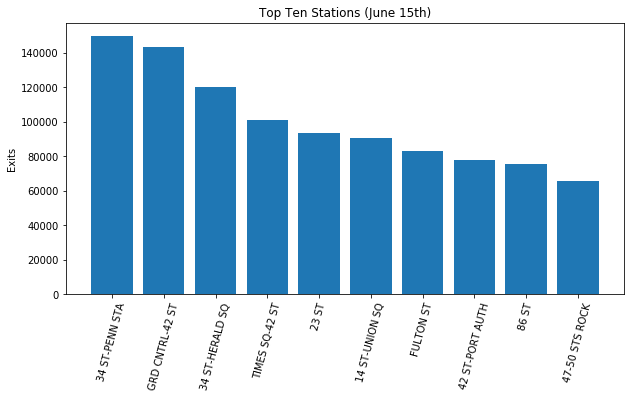

In [119]:
objects = [tup[-1] for tup in fifteen_sixteen[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in fifteen_sixteen[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 15th)')

Text(0.5,1,'Top Ten Stations (June 16th)')

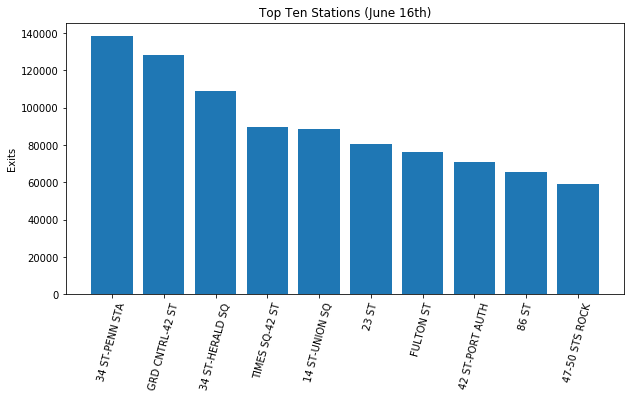

In [120]:
objects = [tup[-1] for tup in sixteen[:10]]
y_pos = np.arange(len(objects))
performance = [tup[0] for tup in sixteen[:10]]

plt.bar(y_pos, performance, align = 'center');
plt.xticks(y_pos, objects, rotation = 75);
plt.ylabel('Exits')
plt.title('Top Ten Stations (June 16th)')

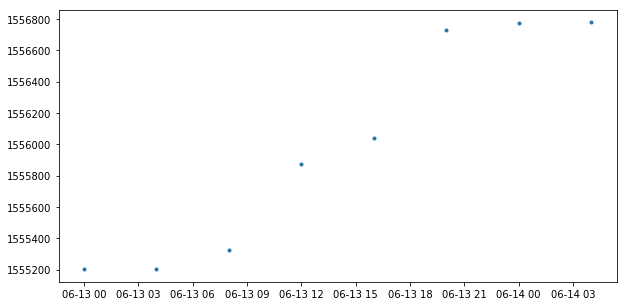

In [147]:
# def inspection(iD, scp):
#     exits = [count for time, count in bigDict[iD][scp]]
#     times = [time for time, count in bigDict[iD][scp]]
#     plt.plot(times, exits)
#     plt.xlabel('Time')
#     plt.ylabel('Exit Tally')
#     plt.title('Exits vs. Time for {}, {}'.format(iD, scp))
#     plt.xticks(rotation=45)
    

# inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
# 34 ST-PENN STA	N067	R012	00-00-00	
def day_inspection(iD, scp, day):
    '''
    This function takes in a (C/A,UNIT,STATION) tuple, and scp, and a day from 10 to 16 (just the number, not datetime).
    It plots a graph of the exit tally for that turnstile on that day. 
    '''
    exits = []
    times = []
    for exit in bigDict[iD][scp]:
        if dt(2017,6,day,0,0,0) <= exit[0] <= dt(2017,6,day+1,4,0,0):
            exits.append(exit[-1])
            times.append(exit[0])
    plt.plot(times,exits, '.')

day_inspection(('N067', 'R012', '34 ST-PENN STA'), '00-00-00', 13)